In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import missingno as msno 





In [13]:
features = pd.read_csv("../0_DataPreparation/features.csv")
features

,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Rain,KielerWoche,CPI,...,Weather_Other,Weather_Rain,Weather_Showers_and_Thunderstorms,Weather_Snow_and_Ice,Group_brot,Group_brotchen,Group_croissant,Group_konditorei,Group_kuchen,Group_saisonbrot
0,1307011,2013-07-01,1,148.828353,6.0,17.8375,15.0,1.567431,0,93.5,...,0,0,0,0,True,False,False,False,False,False
1,1307021,2013-07-02,1,159.793757,3.0,17.3125,10.0,0.140967,0,93.5,...,1,0,0,0,True,False,False,False,False,False
2,1307031,2013-07-03,1,111.885594,7.0,21.0750,6.0,6.276774,0,93.5,...,0,1,0,0,True,False,False,False,False,False
3,1307041,2013-07-04,1,168.864941,7.0,18.8500,7.0,0.126180,0,93.5,...,0,0,0,0,True,False,False,False,False,False
4,1307051,2013-07-05,1,171.280754,5.0,19.9750,12.0,1.255988,0,93.5,...,1,0,0,0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11159,1812226,2018-12-22,6,NaN,8.0,4.3000,4.0,0.392234,0,98.5,...,1,0,0,0,False,False,False,False,False,True
11160,1812236,2018-12-23,6,NaN,7.0,6.4500,9.0,4.244212,0,98.5,...,0,1,0,0,False,False,False,False,False,True
11161,1812246,2018-12-24,6,NaN,7.0,2.5000,10.0,0.000000,0,98.5,...,0,0,0,0,False,False,False,False,False,True
11162,1812276,2018-12-27,6,NaN,7.0,7.1250,12.0,0.000000,0,98.5,...,0,0,0,0,False,False,False,False,False,True


<Axes: >

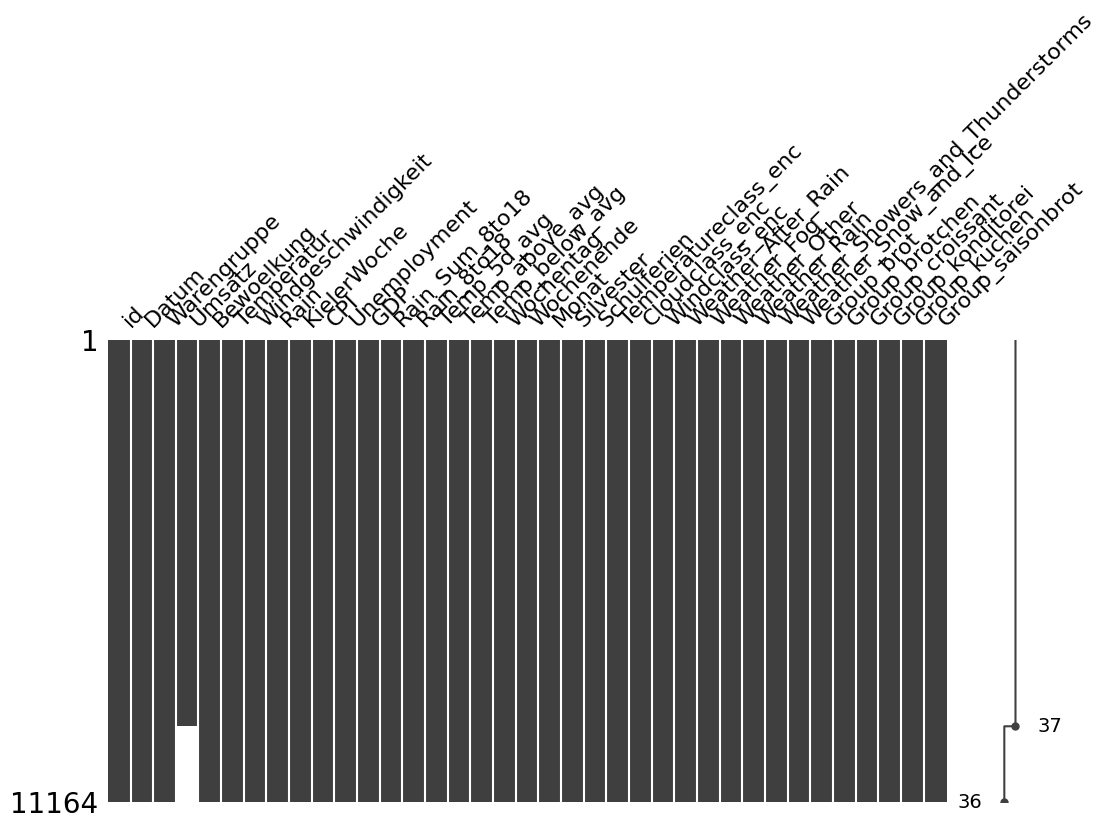

In [14]:
msno.matrix(features, figsize=(12, 6))

## Time Split
We Split the dataset into training, validation and test data

In [15]:
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'


train_data = features[features['Datum']<=train_end_date].set_index("id")
vali_data = features[(features['Datum']> train_end_date) & (features['Datum']<=validation_end_date)].set_index("id")
test_data = features[(features['Datum']> validation_end_date)].set_index("id")

train_data


,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Rain,KielerWoche,CPI,Unemployment,...,Weather_Other,Weather_Rain,Weather_Showers_and_Thunderstorms,Weather_Snow_and_Ice,Group_brot,Group_brotchen,Group_croissant,Group_konditorei,Group_kuchen,Group_saisonbrot
id,,,,,,,,,,,,,,,,,,,,,
1307011,2013-07-01,1,148.828353,6.0,17.8375,15.0,1.567431,0,93.5,6.8,...,0,0,0,0,True,False,False,False,False,False
1307021,2013-07-02,1,159.793757,3.0,17.3125,10.0,0.140967,0,93.5,6.8,...,1,0,0,0,True,False,False,False,False,False
1307031,2013-07-03,1,111.885594,7.0,21.0750,6.0,6.276774,0,93.5,6.8,...,0,1,0,0,True,False,False,False,False,False
1307041,2013-07-04,1,168.864941,7.0,18.8500,7.0,0.126180,0,93.5,6.8,...,0,0,0,0,True,False,False,False,False,False
1307051,2013-07-05,1,171.280754,5.0,19.9750,12.0,1.255988,0,93.5,6.8,...,1,0,0,0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612226,2016-12-22,6,54.322960,7.0,5.2500,8.0,1.991653,0,95.6,5.8,...,0,1,0,0,False,False,False,False,False,True
1612236,2016-12-23,6,133.499200,7.0,6.3750,9.0,0.471172,0,95.6,5.8,...,0,0,0,0,False,False,False,False,False,True
1612246,2016-12-24,6,39.577538,6.0,6.1250,14.0,8.133034,0,95.6,5.8,...,0,0,1,0,False,False,False,False,False,True


## Feature Selection
Define differnt groups of features for testing.

In [20]:
# Set 'id' as index
df = train_data

# Drop rows with missing values for simplicity in this baseline modeling
df_clean = df.dropna()

groups = {
    "Zeit" : "Wochentag + Monat + Wochenende",
    "Wetter" : "Temperatureclass_enc + Cloudclass_enc + Windclass_enc ",
    "Wetter_Stats" : "Rain_8to18 + Temp_above_avg + Temp_below_avg ",
    "Wetter_Group" : "Weather_Other + Weather_Rain + Weather_After_Rain + Weather_Showers_and_Thunderstorms + Weather_Snow_and_Ice + Weather_Fog",
    "Product" : "Warengruppe + Group_brot + Group_brotchen + Group_croissant + Group_konditorei + Group_kuchen + Group_saisonbrot",
    "Ökonomie": "CPI + Unemployment + GDP",
    "Holiday" : "Schulferien + KielerWoche + Silvester + Schulferien"
}

# Define a list of formulas for different baseline models
formulas = {
    "Zeit": f"Umsatz ~ {groups['Zeit']}",
    "Wetter": f"Umsatz ~ {groups['Wetter']}",
    "Wetter+Stats": f"Umsatz ~ {groups['Wetter']} + {groups['Wetter_Stats']}",
    "Product": f"Umsatz ~ {groups['Product']}",
    "Ökonomie": f"Umsatz ~ {groups['Ökonomie']}",
    "Zeit+Wetter": f"Umsatz ~ {groups['Zeit']} + {groups['Wetter']}",
    "Zeit+Stats": f"Umsatz ~ {groups['Zeit']} + {groups['Wetter_Stats']}",
    "Zeit+Product": f"Umsatz ~ {groups['Zeit']} + {groups['Product']}",
    "Zeit+Ökonomie": f"Umsatz ~ {groups['Zeit']} + {groups['Ökonomie']}",
    "Zeit+Holiday": f"Umsatz ~ {groups['Zeit']} + {groups['Holiday']}",
    "Zeit+Wetter+Product": f"Umsatz ~ {groups['Zeit']} + {groups['Wetter']} + {groups['Product']}",
    "Vollmodell": f"Umsatz ~ {groups['Zeit']} + {groups['Wetter']} + {groups['Wetter_Stats']} + {groups['Product']} + {groups['Ökonomie']} + {groups['Holiday']}",
    "Vollmodell+": f"Umsatz ~ {groups['Zeit']} + {groups['Wetter']} + {groups['Wetter_Stats']} + {groups['Wetter_Group']} + {groups['Product']} + {groups['Ökonomie']} + {groups['Holiday']}"
}

# Fit models and collect performance metrics
results = []
for name, formula in formulas.items():
    model = smf.ols(formula, data=df_clean).fit()
    results.append({
        "Modell": name,
        "R²": round(model.rsquared, 4),
        "AIC": round(model.aic, 2),
        "BIC": round(model.bic, 2),
        "Anzahl Parameter": int(model.df_model + 1)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
results_df

,Modell,R²,AIC,BIC,Anzahl Parameter
12,Vollmodell+,0.7540,85671.62,85851.58,26
11,Vollmodell,0.7539,85665.48,85810.83,21
10,Zeit+Wetter+Product,0.7089,86904.12,86987.18,12
7,Zeit+Product,0.6799,87609.94,87672.24,9
3,Product,0.6505,88262.16,88303.69,6
9,Zeit+Holiday,0.0767,95543.79,95592.25,7
5,Zeit+Wetter,0.0663,95627.96,95676.41,7
8,Zeit+Ökonomie,0.0545,95722.40,95770.85,7
2,Wetter+Stats,0.0427,95814.93,95863.39,7
1,Wetter,0.0423,95812.09,95839.78,4


## Create the baseline model

In [21]:
model = smf.ols(formulas['Vollmodell+'], data=train_data.dropna()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Umsatz   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     915.5
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:13:22   Log-Likelihood:                -42810.
No. Observations:                7493   AIC:                         8.567e+04
Df Residuals:                    7467   BIC:                         8.585e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          -650.6656    122.721     -5.302      0.000    -891.232    -410.099
Group_brot[T.True]                 -529.7149     78.485     -6.749      0.000    -683.567    -375.863
Group_brotchen[T.True]             -100.4761     55.298     -1.817      0.069    -208.876       7.923
Group_croissant[T.True]            -206.9476     32.129     -6.441      0.000    -269.930    -143.966
Group_konditorei[T.True]           -141.2254      9.120    -15.485      0.000    -159.103    -123.347
Group_kuchen[T.True]                189.7590     14.504     13.083      0.000     161.327     218.191
Group_saisonbrot[T.True]            137.9395     37.764      3.653      0.000      63.911     211.968
Wochentag                             1.5698      0.698      2.250      0.024       0.202       2.938
Monat                                 1.6383      0.387      4.230      0.000       0.879       2.398
Wochenende                           46.8696      3.104     15.101      0.000      40.785      52.954
Temperatureclass_enc                 27.6728      1.543     17.940      0.000      24.649      30.696
Cloudclass_enc                        4.6973      2.083      2.255      0.024       0.614       8.780
Windclass_enc                         0.2678      0.905      0.296      0.767      -1.505       2.041
Rain_8to18                           -1.6344      2.513     -0.650      0.515      -6.560       3.291
Temp_above_avg                       -9.6669      2.804     -3.448      0.001     -15.163      -4.171
Temp_below_avg                        7.3080      3.238      2.257      0.024       0.961      13.655
Weather_Other                      -111.9995     20.494     -5.465      0.000    -152.173     -71.826
Weather_Rain                       -111.8423     20.544     -5.444      0.000    -152.114     -71.571
Weather_After_Rain                 -112.2544     20.510     -5.473      0.000    -152.460     -72.049
Weather_Showers_and_Thunderstorms  -101.7343     21.630     -4.703      0.000    -144.134     -59.334
Weather_Snow_and_Ice               -102.7153     21.275     -4.828      0.000    -144.421     -61.010
Weather_Fog                        -110.1198     20.798     -5.295      0.000    -150.889     -69.351
Warengruppe                        -139.9798     23.205     -6.032      0.000    -185.468     -94.491
CPI                                  16.8323      2.442      6.894      0.000      12.046      21.619
Unemployment                         33.4270      6.210      5.383      0.000      21.253      45.601
GDP                                  -0.4247      0.070     -6.027      0.000      -0.563      -0.287
Schulferien                          43.1783      2.179     19.816      0.000      38.907      47.450
KielerWoche            

## Make a prediction

In [22]:
pred = model.predict(test_data).clip(lower=0)
pred_df = pred.rename("Umsatz").reset_index()
pred_df.to_csv("kaggle_baseline.csv", index=False)
